<p style="text-align:center">
PSY 394U <b>Data Analytics with Python</b>, Spring 2018


<img style="width: 400px; padding: 0px;" src="https://github.com/sathayas/JupyterAnalyticsSpring2018/blob/master/images/Title_pics.png?raw=true" alt="title pics"/>

</p>

<p style="text-align:center; font-size:40px; margin-bottom: 30px;"><b> Decision trees </b></p>

<p style="text-align:center; font-size:18px; margin-bottom: 32px;"><b>February 27, 2018</b></p>

<hr style="height:5px;border:none" />

# 1. What is a decision tree?
<hr style="height:1px;border:none" />

## Let's divide and conquer

You have a data set of wild mushrooms. They are labeled as either edible or poisonous. Along with this label of toxicity, there are three other features associated with mushrooms. Here is the data in a table form.

<img style="width: 400px; padding: 0px;" src="https://github.com/sathayas/JupyterAnalyticsSpring2018/blob/master/images/Tree_MushroomData.png?raw=true" alt="Mushroom data table"/>

The features are:

  * **`CapSurface`**: Cap surface
     * 0: fibrous
     * 1: scaly
     * 2: smooth
  * **`CapColor`**: Cap color
     * 0: brown
     * 1: white
     * 2: yellow
  * **`GillSize`**: Gill size
     * 0: narrow
     * 1: wide

As you can see, the features are categorical. The target is:
   
  * **`Edible`**: Edible or poisonous?
     * 0: edible
     * 1: poisonous


Your goal is to see if any of the features can split (or classify) the observations into **edible** and **poisonous**. Let's see how each of these features can split observations into two classes.

<table style="width: 700px">
  <tr>
    <td>
    <img style="width: 233px; padding: 0px;" src="https://github.com/sathayas/JupyterAnalyticsSpring2018/blob/master/graphviz/Tree_CapSurface.png?raw=true" alt="CapSurface"/>
    </td>
    <td>
    <img style="width: 233px; padding: 0px;" src="https://github.com/sathayas/JupyterAnalyticsSpring2018/blob/master/graphviz/Tree_CapColor.png?raw=true" alt="CapColor"/>
    </td>
    <td>
    <img style="width: 233px; padding: 0px;" src="https://github.com/sathayas/JupyterAnalyticsSpring2018/blob/master/graphviz/Tree_GillSize.png?raw=true" alt="GillSize"/>
    </td>
  </tr>
</table>

Now which feature produced the best split? In order to determine that, we will use a metric called **entropy**. Here, the entropy we use is different from the entropy you learned in your physics class. **Entropy** is a measure of information content proposed by Claude Shannon in 1948. The entropy in a classification problem can be measured by how heterogeneous target classes are. For example, if there are an equal number of 0s and 1s in the target, then the entropy is high since the sample is highly heterogeneous. On the other hand, if the sample included only 0s or only 1s, then the resulting entropy is zero, since the data is homogeneous. To determine which features split the data the best, we look at whether a split resulted in reduced entropy, and if so, how much. In the example above, splitting the data based on **`GillSize`** seems to reduce the entropy the most. So we will choose to split the data by `GillSize` first. 

But even after splitting the data by `GillSize`, perhaps we can use another feature to split the resulting sub-sample further. So we will select another feature that reduces the entropy the most. In fact, we repeat this until the data is split into solely *edibles* or *poisonouses*. 

<img style="width: 350px; padding: 0px;" src="https://github.com/sathayas/JupyterAnalyticsSpring2018/blob/master/graphviz/Tree_All.png?raw=true" alt="Full decision tree"/>

The end result is known as a **decision tree**. It can be used to classify data based on how observations are split according to features. In general, a decision tree has the following form. 

<img style="width: 500px; padding: 0px;" src="https://github.com/sathayas/JupyterAnalyticsSpring2018/blob/master/graphviz/SampleDecisionTree.png?raw=true" alt="Sample decision tree"/>

The **root node** is the first feature used to split the data. **Decision nodes** are the subsequent splits based on other features. Finally, at **leaves** or **terminal nodes**, no further splitting takes place. Ideally a **leaf** contains only observations belonging to one target class (referred as **pure**). However, in reality, leaf nodes may contain multiple target classes. If that is the case, the majority vote in a leaf node determines the final classification of that node.


## Decision trees: pros and cons

Decision trees have some properties that are beneficial in some situations. However, there are some shortcomings as well. Here are some pros and cons of decision tree classifiers.

### Pros:
  * **Ability to handle both categorical and continuous features**. As you saw in our earlier example, a decision tree can handle categorical features. It can also handle continuous features. A continuous feature is dichotomized or binarized at a certain threshold (e.g., $X<1.75$) so that it becomes a categorical feature. The optimal threshold for dichotomization is determined so that entropy is minimized.
  * **Interpretability**. A decision tree consists of a series of feature criteria that are intuitive and easy to understand. A decision tree can be visualized (as seen in some examples above), although it may involve additional software tools.
  
### Cons:
  * **Tendency to over-fit data**. It is easy to produce a decision tree that fits the training data perfectly. However, such a tree often includes a large number of leaf nodes with one or two observations in one target class. Needless to say such a tree does not perform well as a classifier. Thus, some constraints are required when we generate a decision tree.
  * **Biased to dominant target class**. Say there are 50 poisonous mushrooms and 1000 edible mushrooms in the mushroom data set. Then the decision tree classifier resulting from such a data set is trained to handle the edible class observations.
  * **Impossible to find the optimal tree**. Depending on features, there are infinitely many possible decision trees constructed to handle the same data. Thus, determining the optimal tree is mathematically impossible. Decision trees we use are not the *best* solutions, but *good enough* solution to classify data.
  * **Decision boundaries are rectangular, parallel to axes**. This is pertinent in continuous features. Since such features are dichotomized, the resulting decision boundaries are rectangular.

## Drawing a decision tree

Drawing a decision tree involves an external software package, and beyond the scope of this course. The interested students can read how to draw a decision tree from Scikit-learn's documentation: http://scikit-learn.org/stable/modules/tree.html#classification .



# 2. Example: iris data
<hr style="height:1px;border:none" />

Let's examine the iris data using a decision tree classifier. 

`<IrisTree.py>`

In [1]:
%matplotlib inline

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report

# Loading data
iris = load_iris()
X = iris.data
y = iris.target
feature_names = iris.feature_names
target_names = iris.target_names

Now let's split the data into training and testing data, with testing data comprising 40% of observations.

In [3]:
# spliting the data into training and testing data sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4,
                                                    random_state=2018)

The decision tree classifier can be found as a the **`DecisionTreeClassifier`** transformation object under **`sklearn.tree`**.

In [4]:
# decision tree classifier
dt = DecisionTreeClassifier(criterion='entropy', 
                            min_samples_leaf = 3,
                            max_depth = 4,
                            random_state=0)

Here, we use the parameter **`criterion='entropy'`** to denote that we want to minimize entropy. The parameters **`min_samples_leaf`** and **`max_depth`** are used to avoid over-fitting the data. **`min_samples_leaf = 3`** means that a leaf has to contain at least 3 observations. **`max_depth = 4`** means that the tree can have at most 4 levels, starting from the root all the way down to the deepest leaf. We can also define **`random_state=0`** so that we can re-create the same decision tree again. Once the `DecisionTreeClassifier` object is defined, we can use the **`.fit`** method to learn from the training data. 

In [5]:
dt.fit(X_train,y_train)

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=4,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=3, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=0,
            splitter='best')

Now let's take a look at the classification results on the testing data. Here, we can use **`.predict`** method to generate predicted class labels.

In [6]:
# classification on the testing data set
y_pred = dt.predict(X_test)
print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test, y_pred,
                            target_names=target_names))

[[24  0  0]
 [ 0 19  0]
 [ 0  1 16]]
             precision    recall  f1-score   support

     setosa       1.00      1.00      1.00        24
 versicolor       0.95      1.00      0.97        19
  virginica       1.00      0.94      0.97        17

avg / total       0.98      0.98      0.98        60



As you can see, it did a great job. For your information, here is the resulting decision tree, visualized.

<img style="width: 500px; padding: 0px;" src="https://github.com/sathayas/JupyterAnalyticsSpring2018/blob/master/graphviz/IrisDecisionTree.png?raw=true" alt="Iris data decision tree"/>

Just to demonstrate the tendency for a decision tree to over-fit data, let's try the same analysis with an unconstrained decision tree.

In [7]:
# decision tree classifier, unconstrained
dtUnc = DecisionTreeClassifier(criterion='entropy',
                               random_state=0)
dtUnc.fit(X_train,y_train)
y_pred_unc = dtUnc.predict(X_test)
print(confusion_matrix(y_test,y_pred_unc))
print(classification_report(y_test, y_pred_unc,
                            target_names=target_names))

[[24  0  0]
 [ 0 19  0]
 [ 0  3 14]]
             precision    recall  f1-score   support

     setosa       1.00      1.00      1.00        24
 versicolor       0.86      1.00      0.93        19
  virginica       1.00      0.82      0.90        17

avg / total       0.96      0.95      0.95        60



As you can see, the results are actually worse, possibly due to over-fitting. And here is what the unconstrained tree looks like. 

<img style="width: 600px; padding: 0px;" src="https://github.com/sathayas/JupyterAnalyticsSpring2018/blob/master/graphviz/IrisDecisionTreeUnc.png?raw=true" alt="Iris data decision tree, unconstrained"/>



An earlier classification tree indicated that the petal width and length may be the only features used to classify the data reliably. So we will re-construct the decision tree with those features only.

`<IrisTreePetalOnly.py>`

In [8]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report

def make_meshgrid(x, y, h=.02):
    """Create a mesh of points to plot in

    Parameters
    ----------
    x: data to base x-axis meshgrid on
    y: data to base y-axis meshgrid on
    h: stepsize for meshgrid, optional

    Returns
    -------
    xx, yy : ndarray
    """
    x_min, x_max = np.min(x,axis=0) - 1, np.max(x,axis=0) + 1
    y_min, y_max = np.min(y,axis=0) - 1, np.max(y,axis=0) + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))
    return xx, yy


def plot_contours(ax, clf, x, y, h=.02, **params):
    """Plot the decision boundaries for a classifier.

    Parameters
    ----------
    ax: matplotlib axes object
    clf: a classifier
    x: data to base x-axis meshgrid on
    y: data to base y-axis meshgrid on
    h: stepsize for meshgrid, optional
    params: dictionary of params to pass to contourf, optional
    """
    xx, yy = make_meshgrid(x, y, h)
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    out = ax.contourf(xx, yy, Z, **params)
    return out

# Loading data
iris = load_iris()
X = iris.data[:,2:] # focusing on petal features only 
y = iris.target
feature_names = iris.feature_names[2:]
target_names = iris.target_names

Split into the training and testing data, then fitting a decision tree classifier.

In [9]:
# spliting the data into training and testing data sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4,
                                                    random_state=2018)


# decision tree classifier
dt = DecisionTreeClassifier(criterion='entropy', 
                            min_samples_leaf = 3,
                            max_depth = 4,
                            random_state=0)
dt.fit(X_train,y_train)

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=4,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=3, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=0,
            splitter='best')

And let's examine the decision boundaries.

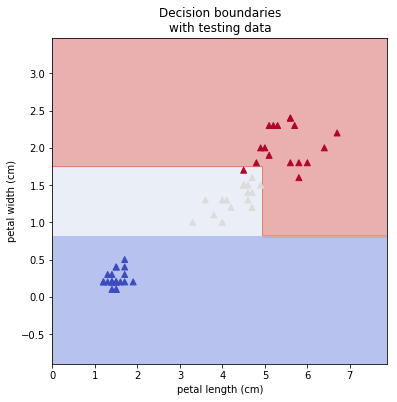

In [10]:
# plotting the boundaries and the testing data
plt.figure(figsize=[6,6])
ax = plt.subplot(111)
plot_contours(ax, dt, X_train[:, 0], X_train[:, 1],
                  cmap=plt.cm.coolwarm, alpha=0.4)
plt.scatter(X_test[:,0], X_test[:,1],
            marker = '^', c=y_test,
            cmap=plt.cm.coolwarm)
plt.title('Decision boundaries\nwith testing data')
plt.xlabel(feature_names[0])
plt.ylabel(feature_names[1])
plt.show()

Here, you can see the rectangular decision boundaries.

# 3. Example: mushroom data
<hr style="height:1px;border:none" />

The mushroom data you saw earlier is actually part of a large data set of mushrooms. There are 8124 observations with 22 features. In this example, we will use all observations but focus on 3 features that pertain to the cap, namely CapShape, CapSurface, and CapColor, stored in the data file **`mushroom_cap.csv`**. 

`<MushroomCapTree.py>`

In [12]:
import numpy as np
import pandas as pd
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report

# loading the data
mushroomData = pd.read_csv('mushroom_cap.csv')
feature_names = mushroomData.columns[1:]

Since the features in this data set are string variables, and `DecisionTreeClassifier` can only handle numerical categorical variables, we need to transform these features into numerical variables. This is done by the **`LabelEncoder()`** transformation object found in **`sklearn.preprocessing`**. This transforms a string categorical variable into numerical categorical variables. The ordering of the categories can be found by the **`classes_`** attribute of the transformation object.

In [13]:
### Converting string categorical variables to numerical categorical

# the target
LEEdible = LabelEncoder()
y = LEEdible.fit_transform(mushroomData.Edible)
Edible_class = LEEdible.classes_
# y=0: edible
# y=1: poisonous

# CapShape
LECapShape = LabelEncoder()
xCapShape = LECapShape.fit_transform(mushroomData.CapShape)
CapShape_class = LECapShape.classes_
# xCapShape=0: bell
# xCapShape=1: conical
# xCapShape=2: convex
# xCapShape=3: flat
# xCapShape=4: knobbed
# xCapShape=5: sunken

# CapSurface
LECapSurface = LabelEncoder()
xCapSurface = LECapSurface.fit_transform(mushroomData.CapSurface)
CapSurface_class = LECapSurface.classes_
# xCapSurface=0: fibrous
# xCapSurface=1: grooves
# xCapSurface=2: scaly
# xCapSurface=3: smooth

# CapColor
LECapColor = LabelEncoder()
xCapColor = LECapColor.fit_transform(mushroomData.CapColor)
CapColor_class = LECapColor.classes_
# xCapColor=0: brown
# xCapColor=1: buff
# xCapColor=2: cinnamon
# xCapColor=3: gray
# xCapColor=4: green
# xCapColor=5: pink
# xCapColor=6: purple
# xCapColor=7: red
# xCapColor=8: white
# xCapColor=9: yellow

### Exercise
1. **Mushroom cap decision tree**. Split the data into the training and testing data set, with the testing data set comprising 2000 observations. Generate the decision tree classifier based on the training data set, with **`min_samples_leaf = 9`** and **`max_depth = 7`**. Examine the confusion matrix and classification report on the predicted class labels.
2. **Field guide for foragers**. You have some friends who like to gather wild mushrooms when they hike. To keep them from being poisoned, create a table of all possible combinations of cap features (shape, surface, and color), as well as their predicted class (edible or poisonous), so that they can determine the toxicity by looking at the cap. For example, the table may say
```
Shape        Surface         Color       Edible
bell         fibrous         brown       poisonous
conical      grooves         buff        edible
...
```


# 4. Random forest classifier
<hr style="height:1px;border:none" />

As I mentioned earlier, a decision tree is a realization of infinitely many other possible decision trees to classify the same data. You can use a single tree as a classifier. Or, you can generate a bunch of decision trees to classify the data. That is the idea of a random forest classifier. If you have a collection of decision trees, then a new observation can be classified based on the majority votes on a class from the trees. In some cases, such an ensemble of classifiers may improve the classification performance. 

Although each tree in a random forest is a decision tree, there are some differences between a tree from a random forest and a regular decision tree.

   1. **Features are selected randomly** in a random forest tree. On the other hand, features are selected optimally in a regular decision tree so that entropy is minimized the most.
   2. **Training data consists of bootstrap samples** in the random forest algorithm. This means observations are selected randomly, with replacement, from the training data set, to generate a different training data set.
   3. **Computationally very intensive** to generate a random forest.
   
A random forest classifier is implemented as the **`RandomForestClassifier`** object in **`sklearn.ensemble`**. The parameters for the `RandomForestClassifier` is similar to that of a `DecisionTreeClassifier`. Here is an example applied to the mushroom cap data we saw earlier.

`<MushroomCapRandomForest.py>`

In [2]:
import numpy as np
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report

# loading the data
mushroomData = pd.read_csv('mushroom_cap.csv')
feature_names = mushroomData.columns[1:]


### Converting string categorical variables to numerical categorical

# the target
LEEdible = LabelEncoder()
y = LEEdible.fit_transform(mushroomData.Edible)
Edible_class = LEEdible.classes_
# y=0: edible
# y=1: poisonous

# CapShape
LECapShape = LabelEncoder()
xCapShape = LECapShape.fit_transform(mushroomData.CapShape)
CapShape_class = LECapShape.classes_
# xCapShape=0: bell
# xCapShape=1: conical
# xCapShape=2: convex
# xCapShape=3: flat
# xCapShape=4: knobbed
# xCapShape=5: sunken

# CapSurface
LECapSurface = LabelEncoder()
xCapSurface = LECapSurface.fit_transform(mushroomData.CapSurface)
CapSurface_class = LECapSurface.classes_
# xCapSurface=0: fibrous
# xCapSurface=1: grooves
# xCapSurface=2: scaly
# xCapSurface=3: smooth

# CapColor
LECapColor = LabelEncoder()
xCapColor = LECapColor.fit_transform(mushroomData.CapColor)
CapColor_class = LECapColor.classes_
# xCapColor=0: brown
# xCapColor=1: buff
# xCapColor=2: cinnamon
# xCapColor=3: gray
# xCapColor=4: green
# xCapColor=5: pink
# xCapColor=6: purple
# xCapColor=7: red
# xCapColor=8: white
# xCapColor=9: yellow



# consolidating the features
X = np.vstack([xCapShape,xCapSurface,xCapColor]).T

# spliting the data into training and testing data sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=2000,
                                                    random_state=2000)

# random forest classifier, training & testing
rf = RandomForestClassifier(criterion='entropy',
                            n_estimators = 50,
                            min_samples_leaf = 9,
                            max_depth = 7,
                            random_state=0)

One additional parameter you have to provide in a random forest classifier is **`n_estimators`**. This is the number of trees to be included in the random forest. In our example, we will go with 50.

In [3]:
rf.fit(X_train,y_train)
y_pred = rf.predict(X_test)
print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test, y_pred,
                            target_names=Edible_class))

[[749 256]
 [329 666]]
             precision    recall  f1-score   support

     edible       0.69      0.75      0.72      1005
  poisonous       0.72      0.67      0.69       995

avg / total       0.71      0.71      0.71      2000



Are the results better than a regular decision tree? For a comparison, let's take a look at a decision tree on the same data.

In [4]:
# For a comparision, 
# decision tree classifier, training & testing
dt = DecisionTreeClassifier(criterion='entropy', 
                            min_samples_leaf = 9,
                            max_depth = 7,
                            random_state=0)
dt.fit(X_train,y_train)
y_pred = dt.predict(X_test)
print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test, y_pred,
                            target_names=Edible_class))

[[753 252]
 [331 664]]
             precision    recall  f1-score   support

     edible       0.69      0.75      0.72      1005
  poisonous       0.72      0.67      0.69       995

avg / total       0.71      0.71      0.71      2000



So, it doesn't seem like a random forest improves the classifier performance.